<a href="https://colab.research.google.com/github/yogendra1109/Customer-lifetime-value-Insurance/blob/main/CLTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pycaret

In [2]:
!pip install sweetviz

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_path = '/content/drive/My Drive/Hackathon/train1.csv'
test_path = '/content/drive/My Drive/Hackathon/test1.csv'
sample_path = '/content/drive/My Drive/Hackathon/sample1.csv'

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sample = pd.read_csv(sample_path)

In [9]:
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [7]:
import sweetviz as sv
sweetviz_report = sv.analyze(train)
sweetviz_report.show_html('train.html')

                                             |          | [  0%]   00:00 -> (? left)

Report train.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


area
Rural       NaN
Urban    3672.0
Name: cltv, dtype: float64

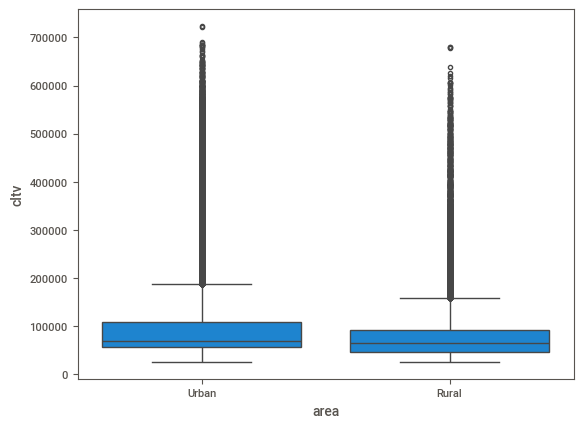

In [8]:
sns.boxplot(x='area', y='cltv', data=train)
train.groupby(by = ['area'])['cltv'].median().diff()


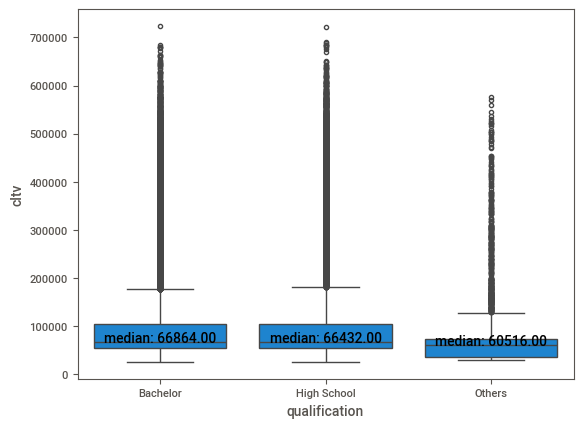

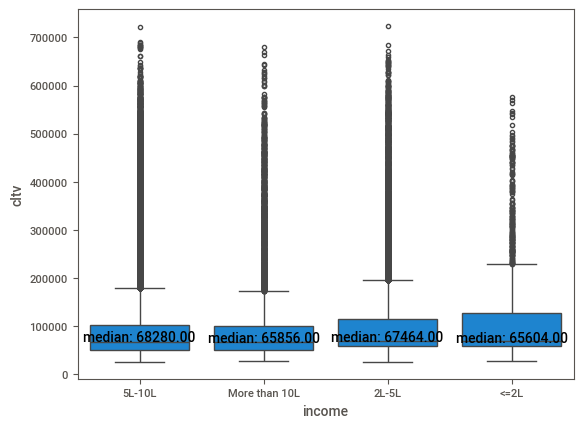

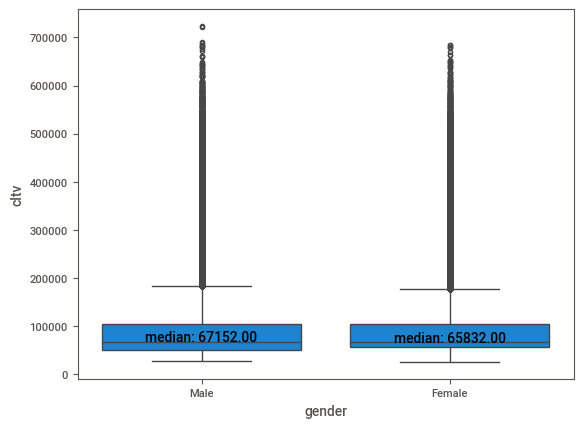

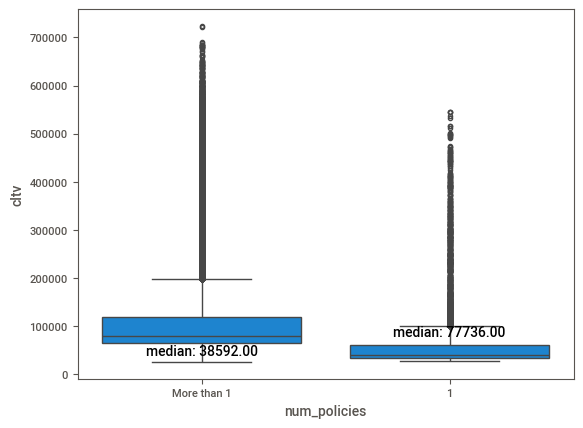

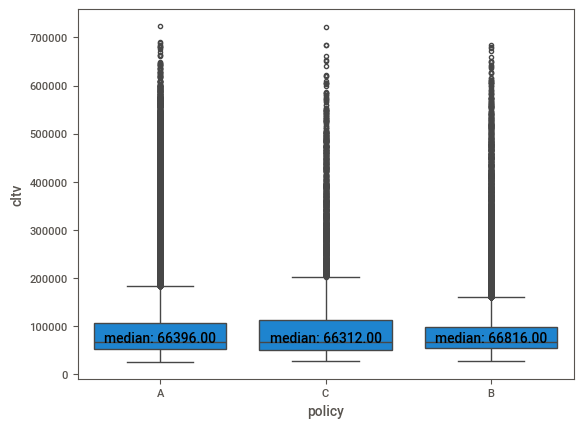

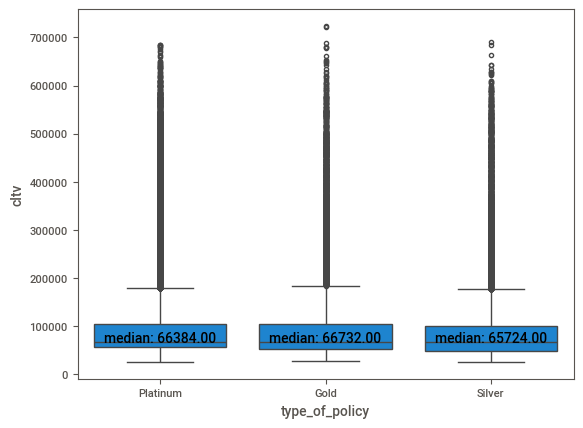

In [12]:
for i in ['qualification', 'income', 'gender','num_policies', 'policy', 'type_of_policy']:
  ax = sns.boxplot(x=i, y='cltv', data=train)
  # calculate the mean and median of the 'total_bill' column for each category of the 'day' column
  grouped_data = train.groupby(i)['cltv'].median()

  # add the mean and median labels to the box plot
  for i in range(len(grouped_data)):
      ax.text(i, grouped_data[i] + 5, 'median: {:.2f}'.format(grouped_data[i]), horizontalalignment='center', color='black')
  plt.show()

In [13]:
train.columns


Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [14]:
from pycaret.regression import *
cat_f = ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy']

In [15]:
exp_reg101 = setup(data =train, target = 'cltv', categorical_features = cat_f,
                   normalize = True,session_id = 123,transformation = True,
                   remove_multicollinearity = True, multicollinearity_threshold = 0.95)

,Description,Value
0,Session id,123
1,Target,cltv
2,Target type,Regression
3,Original data shape,"(89392, 12)"
4,Transformed data shape,"(89392, 21)"
5,Transformed train set shape,"(62574, 21)"
6,Transformed test set shape,"(26818, 21)"
7,Numeric features,4
8,Categorical features,7
9,Preprocess,True


In [16]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [17]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,50689.3157,6949580249.4586,83349.3550,0.1585,0.5672,0.5495,9.0640
lightgbm,Light Gradient Boosting Machine,50771.3055,6989164501.7325,83586.1695,0.1538,0.5686,0.5499,5.1960
lasso,Lasso Regression,51928.2740,7034255647.8723,83854.8648,0.1483,0.5889,0.5735,4.1050
ridge,Ridge Regression,51928.5715,7034257242.9653,83854.8746,0.1483,0.5889,0.5735,1.5570
lar,Least Angle Regression,51928.6524,7034257310.1788,83854.8751,0.1483,0.5889,0.5735,1.5900
llar,Lasso Least Angle Regression,51928.2770,7034255648.0658,83854.8648,0.1483,0.5889,0.5735,1.5500
br,Bayesian Ridge,51920.0072,7034253835.1576,83854.8494,0.1483,0.5888,0.5735,1.5890
lr,Linear Regression,51922.4174,7034201440.8657,83854.4784,0.1483,0.5888,0.5733,2.1650
omp,Orthogonal Matching Pursuit,51861.2880,7085163551.8685,84157.1341,0.1422,0.5833,0.5661,1.6020
en,Elastic Net,51710.3593,7143269770.8314,84501.7456,0.1351,0.5951,0.5960,1.7260


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [18]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,49636.1174,6711046711.2096,81920.9785,0.1644,0.5621,0.5439
1,50470.8295,7028329102.9292,83835.1305,0.1625,0.5648,0.5441
2,50528.8061,6760677340.8955,82223.3382,0.1592,0.5654,0.5470
3,49821.7559,6679155871.9348,81726.1028,0.1588,0.5633,0.5489
4,51331.6488,7059713080.1957,84022.0988,0.1607,0.5692,0.5550
5,51405.0901,6956484234.3326,83405.5408,0.1460,0.5726,0.5551
6,49967.8006,6578127980.3064,81105.6594,0.1635,0.5648,0.5575
7,50795.5286,6966255800.9184,83464.0989,0.1550,0.5703,0.5528
8,51349.2293,7367978572.6960,85836.9301,0.1549,0.5709,0.5486


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,50297.9201,6845712034.6752,82738.8182,0.1477,0.5881,0.5879
1,50965.0504,7173898423.7152,84698.8691,0.1452,0.5887,0.5848
2,50800.7870,6882469193.3837,82960.6485,0.1441,0.5861,0.5816
3,50118.5587,6801276905.5539,82469.8545,0.1434,0.5867,0.5874
4,51467.7269,7211405977.3317,84919.9975,0.1426,0.5880,0.5848
5,51540.3117,7048724802.2938,83956.6841,0.1347,0.5915,0.5886
6,50361.7671,6686711956.9729,81772.3178,0.1496,0.5877,0.5956
7,51178.0043,7091639802.9058,84211.8745,0.1398,0.5931,0.5912
8,51721.5613,7523132204.1183,86735.9914,0.1371,0.5933,0.5854


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [20]:
predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,50337.4029,6791909595.3845,82413.0426,0.1612,0.5653,0.5492


,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,prediction_label
45025,45026,Female,Rural,High School,5L-10L,1,4,2230,More than 1,A,Gold,337800,99985.509756
61836,61837,Male,Urban,High School,5L-10L,0,5,5769,1,A,Gold,30528,52057.746608
39285,39286,Male,Urban,Others,<=2L,1,4,5454,1,B,Gold,60468,45669.832509
68659,68660,Female,Urban,High School,5L-10L,0,2,9585,More than 1,A,Platinum,150600,147237.826277
22560,22561,Male,Urban,High School,5L-10L,1,6,6538,More than 1,A,Platinum,59184,131228.099289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19151,19152,Female,Urban,Bachelor,More than 10L,0,5,0,1,B,Platinum,61464,49134.349064
57262,57263,Male,Urban,High School,5L-10L,0,2,6084,More than 1,A,Silver,112032,134516.364833
1033,1034,Female,Urban,Bachelor,5L-10L,1,0,8533,More than 1,B,Silver,173688,124290.982778
17914,17915,Male,Urban,Bachelor,5L-10L,1,6,5292,More than 1,A,Gold,127392,125733.732653


In [21]:
unseen_predictions = predict_model(tuned_gbr, data=test)
unseen_predictions.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,prediction_label
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver,90035.828566
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum,123760.105309
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold,87095.600847
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver,79567.974639
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver,130494.222707


In [23]:
pred_sumbit = pd.DataFrame(data={"id":unseen_predictions["id"],"cltv":unseen_predictions["prediction_label"]})
pred_sumbit.to_csv('predict_gbr.csv',mode = 'w', index=False)

There are other Models Like lightgbm, Lasso and other do try them also for better understanding
